C:\Users\sam jacob\AppData\Local\Temp\ipykernel_5936\2925489706.py:182: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in pivot_data.iteritems():


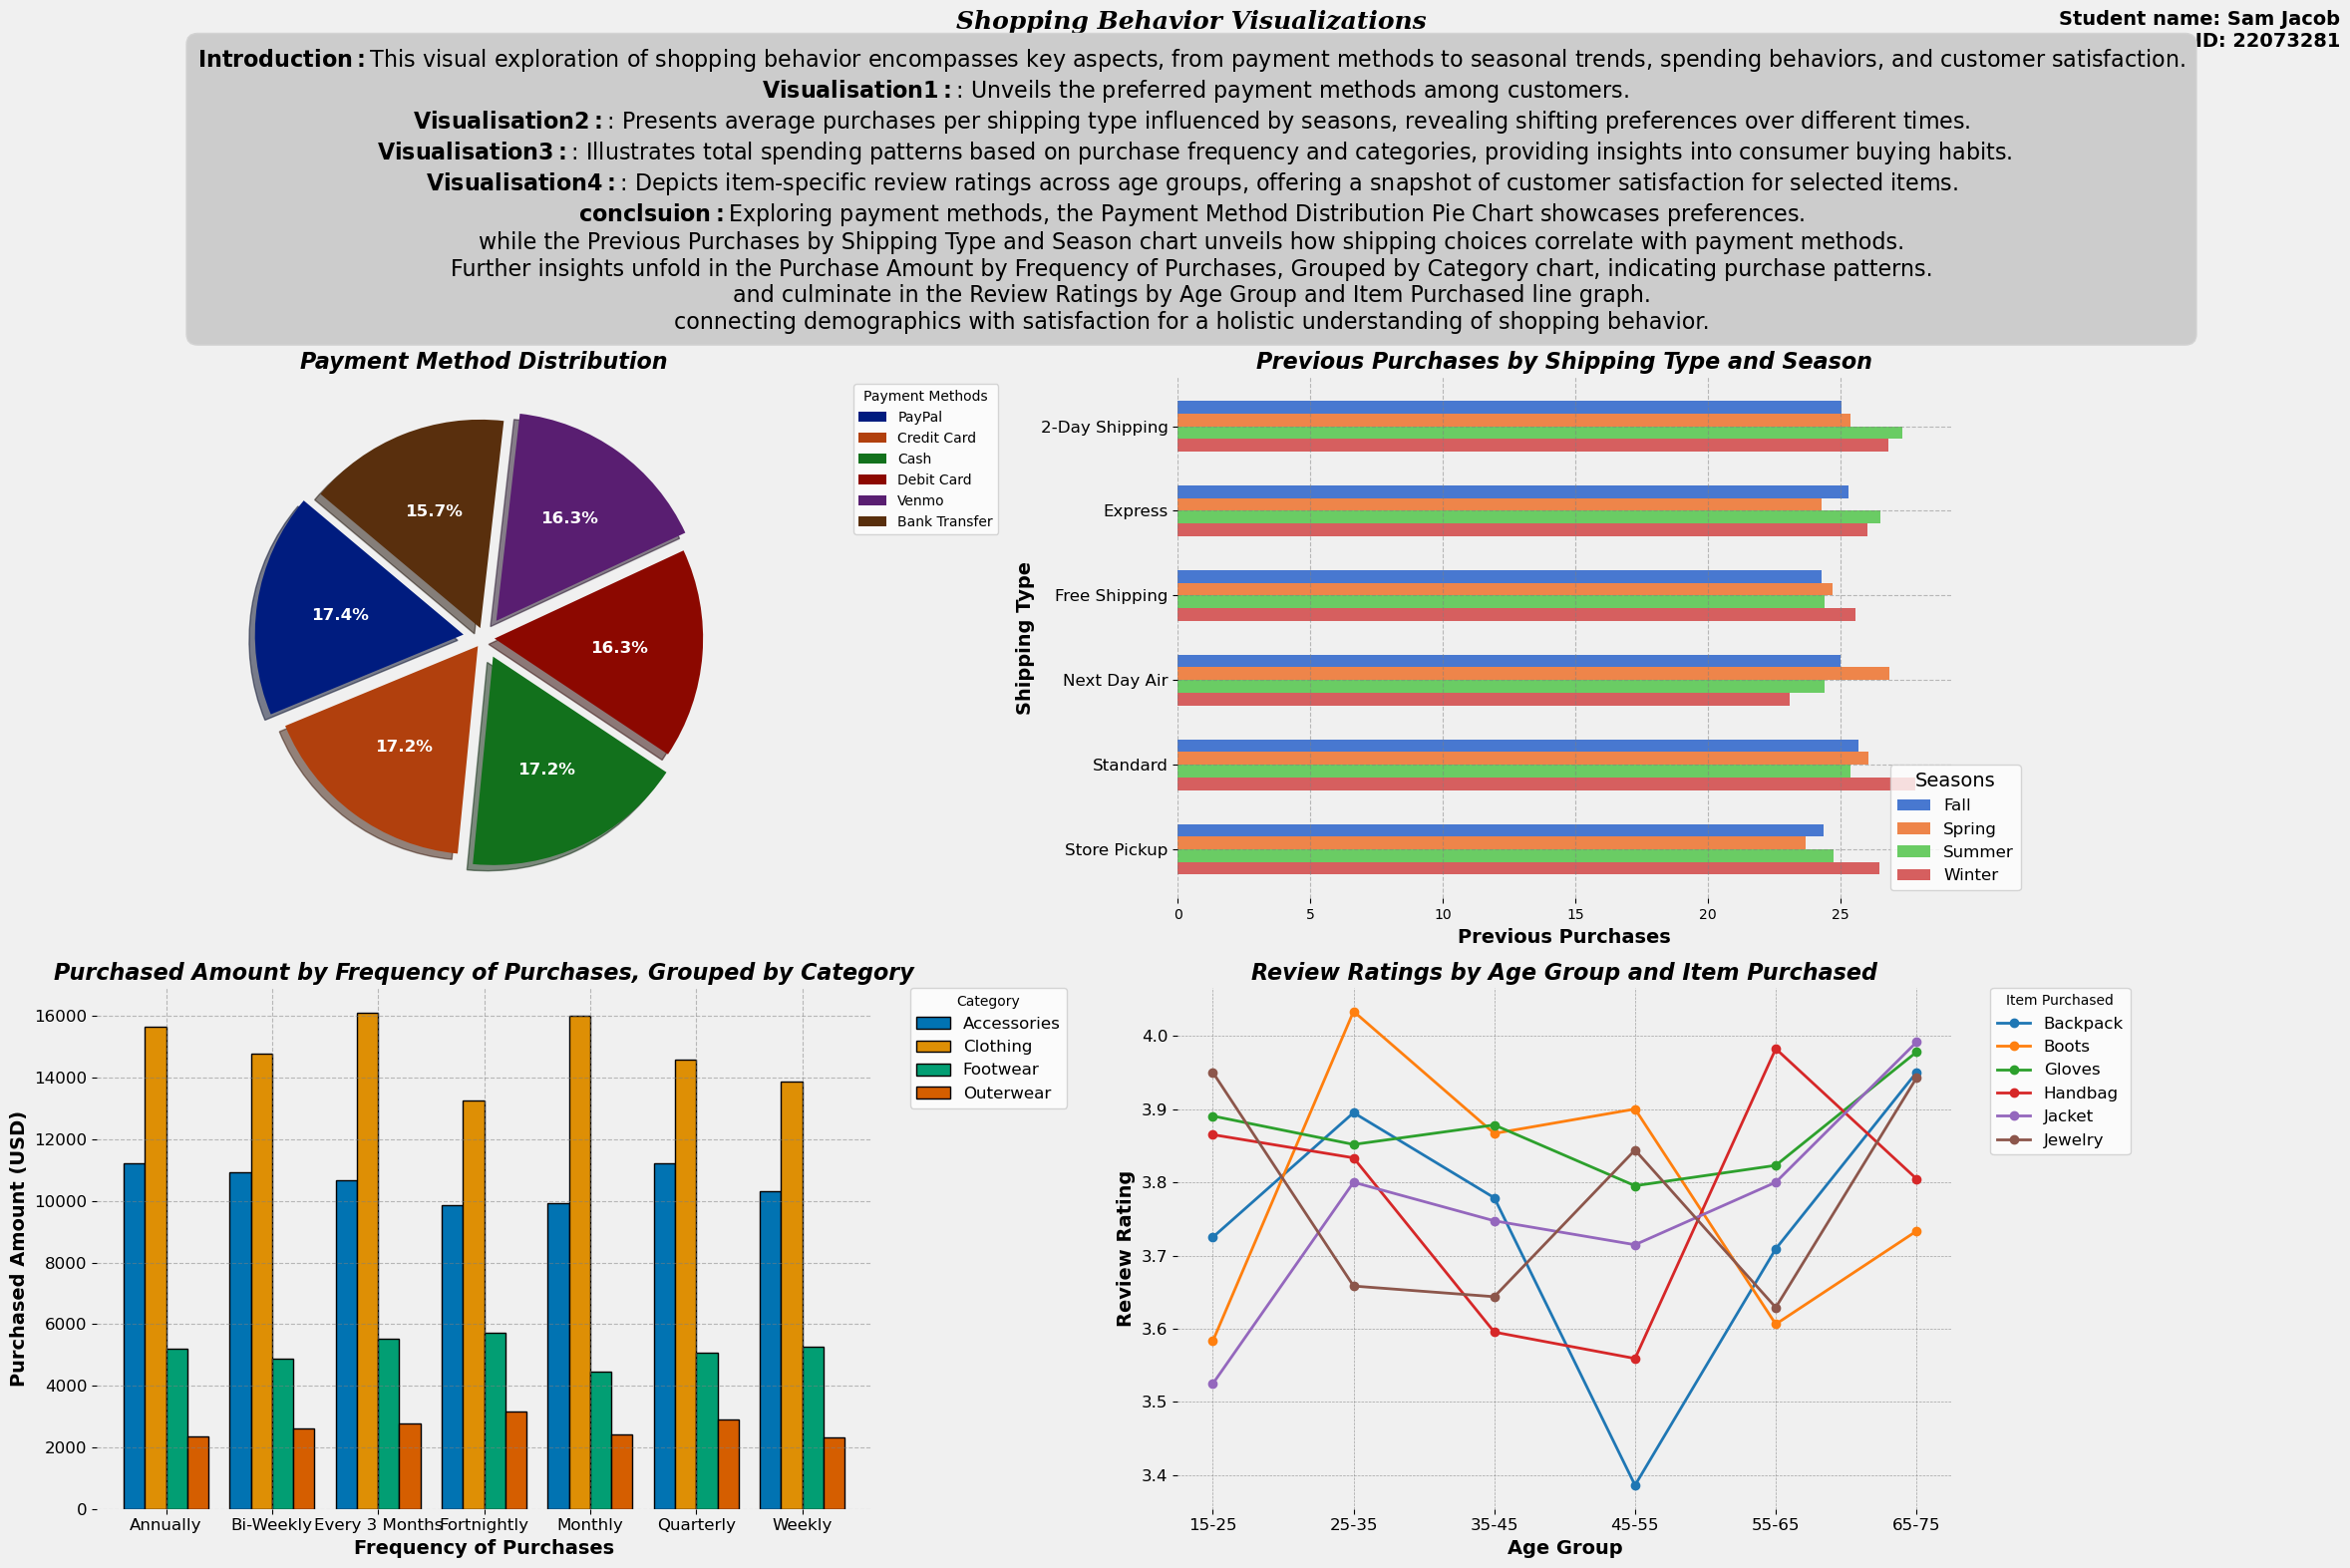

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
df = pd.read_csv("shopping_behavior_updated.csv")

# Set up subplots with a bold and stylish background color
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16), facecolor='#f0f0f0')

# Set title with various font properties
fig.suptitle("Shopping Behavior Visualizations",
             fontsize=18,
             color='black',
             weight='bold',
             ha='center',  # Horizontal alignment
             va='top',  # Vertical alignment (top to add variety)
             style='italic',  # Font style (italic for variety)
             family='serif')  # Font family (serif for variety)

# Add student information with more bold type
fig.text(0.98, 0.98, 'Student name: Sam Jacob\n ID: 22073281\n',
         fontsize=14,
         ha='right',
         va='top',
         color='black',
         weight='bold')  # Making it more bold

# Descriptions for all plots
descriptions = [
    "$\mathbf{Introduction:}$This visual exploration of shopping behavior encompasses key aspects, from payment methods to seasonal trends, spending behaviors, and customer satisfaction.",
    " $\mathbf{Visualisation 1:}$: Unveils the preferred payment methods among customers.",
    "$\mathbf{Visualisation  2:}$: Presents average purchases per shipping type influenced by seasons, revealing shifting preferences over different times.",
    " $\mathbf{Visualisation 3:}$: Illustrates total spending patterns based on purchase frequency and categories, providing insights into consumer buying habits.",
    "$\mathbf{Visualisation 4:}$: Depicts item-specific review ratings across age groups, offering a snapshot of customer satisfaction for selected items.",
    "$\mathbf{conclsuion:}$Exploring payment methods, the Payment Method Distribution Pie Chart showcases preferences.",
    "while the Previous Purchases by Shipping Type and Season chart unveils how shipping choices correlate with payment methods.",
    "Further insights unfold in the Purchase Amount by Frequency of Purchases, Grouped by Category chart, indicating purchase patterns.",
    "and culminate in the Review Ratings by Age Group and Item Purchased line graph.",
    "connecting demographics with satisfaction for a holistic understanding of shopping behavior.",
]

# Stylish color and box style for all descriptions
color = '#CCCCCC'
boxstyle = 'round,pad=0.5'

# Combine all descriptions into a single string
combined_description = '\n'.join(descriptions)

# Display all descriptions in a single box with a stylish color
fig.text(0.5, 0.78, combined_description, ha='center', fontsize=16, color='black',
         bbox=dict(facecolor=color, edgecolor='lightgrey', boxstyle=boxstyle))

# Payment Method Distribution Pie Chart
payment_method_counts = df['Payment Method'].value_counts()

# Create an explode list to offset slices in the pie chart to give a 3D effect
explode = [0.1 if i % 2 == 0 else 0.05 for i in range(len(payment_method_counts))]
colors = sns.color_palette('dark', len(payment_method_counts))

# Plotting the pie chart with a '3D' effect
wedges, texts, autotexts = axes[0, 0].pie(payment_method_counts, autopct='%1.1f%%', startangle=140, explode=explode,
                                          colors=colors, shadow=True)

# Custom styling for the pie chart
axes[0, 0].set_title('Payment Method Distribution', fontsize=16, color='black', weight='bold', style='italic')

# Adding custom styling to the pie chart texts
for text in texts:
    text.set_color('grey')
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

# Set the legend with custom settings
axes[0, 0].legend(wedges, payment_method_counts.index, title='Payment Methods', loc='best',
                  bbox_to_anchor=(1, 0, 0.5, 1))

# Horizontal Bar chart of Previous Purchases for each Shipping Type, grouped by Season
bar_width = 0.15  # Smaller width for better separation between bars
bar_positions = np.arange(len(df['Shipping Type'].unique()))  # Base positions for the bars

# Custom colors for the bars
colors = sns.color_palette('muted', n_colors=len(df['Season'].unique()))

# Loop over the seasons and plot the bars
for i, season in enumerate(sorted(df['Season'].unique())):
    season_data = df[df['Season'] == season]
    previous_purchases = []

    for ship_type in sorted(df['Shipping Type'].unique()):
        ship_type_data = season_data[season_data['Shipping Type'] == ship_type]
        previous_purchases.append(ship_type_data['Previous Purchases'].mean())

    # Position of the bar for this season
    bar_pos = bar_positions + i * bar_width

    # Draw the bars
    axes[0, 1].barh(bar_pos, previous_purchases, height=bar_width, label=season, color=colors[i])

# Custom styling for the horizontal bar chart
axes[0, 1].set_facecolor('#f0f0f0')  # Match subplot background with figure background
axes[0, 1].grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid lines for readability
axes[0, 1].set_title('Previous Purchases by Shipping Type and Season', fontsize=16, color='black', weight='bold',
                     style='italic')
axes[0, 1].set_xlabel('Previous Purchases', fontsize=14, weight='bold', color='black')
axes[0, 1].set_ylabel('Shipping Type', fontsize=14, weight='bold', color='black')
axes[0, 1].set_yticks(bar_positions + bar_width * (len(df['Season'].unique()) - 1) / 2)  # Center the ticks between the bars
axes[0, 1].set_yticklabels(sorted(df['Shipping Type'].unique()), fontsize=12)  # Set the shipping type labels with custom font size
axes[0, 1].invert_yaxis()  # Invert the y-axis to have the bars start from the bottom of the axis

# Set the legend with custom settings
legend_params = {
    'title': 'Seasons',
    'loc': 'lower right',
    'bbox_to_anchor': (1.1, 0),  # Position the legend outside the plot area
    'frameon': True,  # Draw a frame around the legend
    'fontsize': 12,
    'title_fontsize': 14,
}
axes[0, 1].legend(**legend_params)

# Grouped bar chart comparing Purchase Amount (USD) for each Frequency of Purchases, grouped by Category
category_frequency_purchase = df.groupby(['Frequency of Purchases', 'Category'])['Purchase Amount (USD)'].sum().unstack()

# Use seaborn's color palette for aesthetic colors
colors = sns.color_palette('colorblind', n_colors=len(category_frequency_purchase.columns))

# Plotting the grouped bar chart
category_frequency_purchase.plot(kind='bar', width=0.8, ax=axes[1, 0], color=colors, edgecolor='black')

# Styling the bar chart
axes[1, 0].set_facecolor('#f0f0f0')  # Match subplot background with figure background
axes[1, 0].grid(True, linestyle='--', color='gray', alpha=0.5)  # Add grid lines for readability
axes[1, 0].set_title('Purchased Amount by Frequency of Purchases, Grouped by Category', fontsize=16, color='black',
                     weight='bold', style='italic')
axes[1, 0].set_xlabel('Frequency of Purchases', fontsize=14, weight='bold', color='black')
axes[1, 0].set_ylabel('Purchased Amount (USD)', fontsize=14, weight='bold', color='black')
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)  # Customize tick parameters
axes[1, 0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True,
                  fontsize=12)  # Customize the legend

# Here's the updated part for the x-axis labels
axes[1, 0].tick_params(axis='x', which='major', labelsize=12, rotation=0)  # Set the x-axis labels to be horizontal

# Remove spines from the bar chart
for spine in axes[1, 0].spines.values():
    spine.set_visible(False)

# Line graph for Review Ratings by Age Group and Item Purchased
age_bins = [15, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

selected_items = ['Jacket', 'Gloves', 'Backpack', 'Handbag', 'Jewelry', 'Boots']
df_filtered = df[df['Item Purchased'].isin(selected_items)]

grouped_data = df_filtered.groupby(['Age Group', 'Item Purchased'])['Review Rating'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Age Group', columns='Item Purchased', values='Review Rating')

cmap = plt.get_cmap('Dark2')

# Line graph for Review Ratings by Age Group and Item Purchased
age_bins = [15, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

selected_items = ['Jacket', 'Gloves', 'Backpack', 'Handbag', 'Jewelry', 'Boots']
df_filtered = df[df['Item Purchased'].isin(selected_items)]

grouped_data = df_filtered.groupby(['Age Group', 'Item Purchased'])['Review Rating'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Age Group', columns='Item Purchased', values='Review Rating')

# Define a custom color map
custom_cmap = ['skyblue', 'salmon', 'lightgreen', 'violet', 'orange', 'grey']

# Plot each line with custom settings
for (columnName, columnData) in pivot_data.iteritems():
    axes[1, 1].plot(columnData.index, columnData, marker='o', linestyle='-', label=columnName, linewidth=2)

# Custom styling for the line chart
axes[1, 1].set_facecolor('#f0f0f0')  # Matching the background color
axes[1, 1].grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)  # Adding a grid
axes[1, 1].set_title('Review Ratings by Age Group and Item Purchased', fontsize=16, color='black', weight='bold',
                     style='italic')
axes[1, 1].set_xlabel('Age Group', fontsize=14, weight='bold', color='black')
axes[1, 1].set_ylabel('Review Rating', fontsize=14, weight='bold', color='black')
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Set the legend with custom settings
axes[1, 1].legend(title='Item Purchased', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=True,
                  fontsize=12)

# Remove the spines
for spine in axes[1, 1].spines.values():
    spine.set_visible(False)

for ax_row in axes:
    for ax in ax_row:
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')

# Remove white background from bar charts and line plot
for ax_row in axes:
    for ax in ax_row:
        ax.patch.set_facecolor('none')  # Set background color to transparent
        ax.spines['top'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['left'].set_color('none')
        ax.spines['right'].set_color('none')

plt.tight_layout(rect=[0, 0, 0.9, 0.8])

# Save the figure
plt.savefig("shop.png", dpi=300, bbox_inches='tight')
plt.show()
